In [20]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
df = pd.read_csv('test.csv')

Dropping First column, land area ones since they came as blank

In [22]:
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [23]:
df.head()

,city,state,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,...,people in poverty,businesses,men owned businesses,female owned businesses,minority owned businesses,nonminority owned businesses,veteran owned businesses,nonveteran owned businesses,population per square mile,land area in square miles
0,Birmingham,Alabama,liberal,209880,6.5,20.3,14.2,53.1,25.3,70.5,...,27.2,20738,10318,8286,10605,8770,2082,17113,0,0
1,Montgomery,Alabama,liberal,198218,6.8,24.0,13.7,53.0,33.3,60.6,...,21.9,18043,8879,7459,8793,8363,2352,14434,0,0
2,Mobile,Alabama,liberal,189572,6.3,21.7,16.0,52.6,44.8,50.6,...,22.0,20118,9703,8644,8808,10250,2275,16639,0,0
3,Huntsville,Alabama,liberal,197318,6.4,21.1,15.7,51.9,61.6,30.6,...,17.7,16838,8211,6565,4380,11515,1816,13915,0,0
4,Tuscaloosa,Alabama,liberal,101113,5.9,18.8,11.7,52.4,51.1,44.1,...,24.2,6802,3374,2530,1953,4375,670,5438,0,0


In [24]:
df.shape

(2983, 47)

In [25]:
df.columns

Index(['city', 'state', 'political affiliation', 'population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelor's degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'healthcare and social assistance revenue ($1,000)',
       'manufacturers shipments ($1,000)',
       'avg travel time to work (min), 16+', 'avg household in

We dont need city or state anymore as they are just identifiers and potentially overpower local politics too much

In [26]:
df.drop(columns = ['city','state'],inplace=True)





Checking for class imbalance

In [27]:
df['political affiliation'].value_counts()

liberal         1763
conservative    1195
Name: political affiliation, dtype: int64

Checking for null values

In [28]:
df.isnull().sum()

political affiliation                                25
population                                            0
people under age 5                                    0
people under age 18                                   0
people 65 and older                                   0
female                                                0
white                                                 0
black                                                 0
american indian or alaska native                      0
asian                                                 0
native hawaiian and other pacific islander            0
2+ races                                              0
hispanic                                              0
veteran                                               0
foreign born                                          0
owner occupied houses                                 0
avg value of owner occupied houses                    0
avg rent                                        

In [29]:
df.head()


,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,american indian or alaska native,asian,...,people in poverty,businesses,men owned businesses,female owned businesses,minority owned businesses,nonminority owned businesses,veteran owned businesses,nonveteran owned businesses,population per square mile,land area in square miles
0,liberal,209880,6.5,20.3,14.2,53.1,25.3,70.5,0.2,0.9,...,27.2,20738,10318,8286,10605,8770,2082,17113,0,0
1,liberal,198218,6.8,24.0,13.7,53.0,33.3,60.6,0.2,2.8,...,21.9,18043,8879,7459,8793,8363,2352,14434,0,0
2,liberal,189572,6.3,21.7,16.0,52.6,44.8,50.6,0.2,1.8,...,22.0,20118,9703,8644,8808,10250,2275,16639,0,0
3,liberal,197318,6.4,21.1,15.7,51.9,61.6,30.6,0.4,2.7,...,17.7,16838,8211,6565,4380,11515,1816,13915,0,0
4,liberal,101113,5.9,18.8,11.7,52.4,51.1,44.1,0.3,2.4,...,24.2,6802,3374,2530,1953,4375,670,5438,0,0


Currently all of our data types are continuous, many of these we will
later bucket and categorize but first we'll take a look at the distributions


In [30]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 45 columns):
political affiliation                                2958 non-null object
population                                           2983 non-null int64
people under age 5                                   2983 non-null float64
people under age 18                                  2983 non-null float64
people 65 and older                                  2983 non-null float64
female                                               2983 non-null float64
white                                                2983 non-null float64
black                                                2983 non-null float64
american indian or alaska native                     2983 non-null float64
asian                                                2983 non-null float64
native hawaiian and other pacific islander           2983 non-null float64
2+ races                                             2983 non-null floa

## Outliers
Currently all of our features are continuous. We'll start looking at these in detail

In [31]:
df.rename(columns={"bachelor's degree or higher, 25+": 'bachelors degree or higher, 25+'},inplace=True)

In [32]:
continuous = ['population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'healthcare and social assistance revenue ($1,000)',
       'manufacturers shipments ($1,000)',
       'avg travel time to work (min), 16+', 'avg household income',
       'per capita income in last 12 months', 'people in poverty',
       'businesses', 'men owned businesses', 'female owned businesses',
       'minority owned businesses', 'nonminority owned businesses',
       'veteran owned businesses', 'nonveteran owned businesses',
       'population per square mile','land area in square miles']
for column in continuous:
    print(df[column].describe())
    print('\n')

count    2.983000e+03
mean     8.437858e+07
std      1.431121e+08
min      5.005000e+03
25%      1.145150e+04
50%      3.125300e+04
75%      3.271674e+08
max      3.271674e+08
Name: population, dtype: float64


count    2983.000000
mean        6.297586
std         1.440013
min         0.000000
25%         5.800000
50%         6.100000
75%         7.000000
max        14.700000
Name: people under age 5, dtype: float64


count    2983.000000
mean       22.988937
std         4.136385
min         0.100000
25%        21.500000
50%        22.400000
75%        25.100000
max        39.000000
Name: people under age 18, dtype: float64


count    2983.000000
mean       15.701274
std         4.931944
min         2.100000
25%        13.150000
50%        16.000000
75%        16.800000
max        82.800000
Name: people 65 and older, dtype: float64


count    2983.000000
mean       51.057593
std         2.693380
min        19.400000
25%        50.650000
50%        50.800000
75%        52.100000
max    

The percentages are in whole numbers so we're going to turn them into
percentages by dividing by 100

In [14]:
percentages = ['people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'foreign born', 'owner occupied houses','living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+', 'people in poverty']
for column in percentages:
    df[column]=df[column]/100
    print(df[column].describe())
    print('\n')

count    2983.000000
mean        0.062976
std         0.014400
min         0.000000
25%         0.058000
50%         0.061000
75%         0.070000
max         0.147000
Name: people under age 5, dtype: float64


count    2983.000000
mean        0.229889
std         0.041364
min         0.001000
25%         0.215000
50%         0.224000
75%         0.251000
max         0.390000
Name: people under age 18, dtype: float64


count    2983.000000
mean        0.157013
std         0.049319
min         0.021000
25%         0.131500
50%         0.160000
75%         0.168000
max         0.828000
Name: people 65 and older, dtype: float64


count    2983.000000
mean        0.510576
std         0.026934
min         0.194000
25%         0.506500
50%         0.508000
75%         0.521000
max         0.642000
Name: female, dtype: float64


count    2983.000000
mean        0.747094
std         0.176287
min         0.011000
25%         0.706500
50%         0.765000
75%         0.873000
max         0.99400

Turning veteran into % of population 

In [33]:
df['veteran'] = (df['veteran']/df['population'])

Most of the business counts by category can be interprolated from 
the others so removing them for multi-collinearity. Population per square mile can also be interprolated from population and land area so dropping it.

In [34]:
df.drop(columns = ['men owned businesses','nonminority owned businesses','nonveteran owned businesses','population per square mile'],inplace=True)

Turning columns where we have counts and total into % to standardize
a bit

In [41]:
df['female owned businesses']=df['female owned businesses']/df['businesses']
df['minority owned businesses']=df['minority owned businesses']/df['businesses']
df[]





In [42]:
df['veteran']

0       6.099200
1       7.208730
2       6.484080
3       8.729057
4       4.854964
          ...   
2978    5.870715
2979    4.903691
2980    6.741653
2981    5.688657
2982    5.688657
Name: veteran, Length: 2983, dtype: float64

In [36]:
#new continuous columns list
continuous = ['population',
       'people under age 5', 'people under age 18', 'people 65 and older',
       'female', 'white', 'black', 'american indian or alaska native', 'asian',
       'native hawaiian and other pacific islander', '2+ races', 'hispanic',
       'veteran', 'foreign born', 'owner occupied houses',
       'avg value of owner occupied houses', 'avg rent', 'households',
       'people per household', 'living in same house for over a year',
       'language other than english spoken at home',
       'households with computer', 'households with internet',
       'high school graduate or higher, 25+',
       'bachelors degree or higher, 25+', 'with disability, under 65',
       'without health insurance, under 65', 'total labor force, 16+',
       'female labor force, 16+',
       'healthcare and social assistance revenue ($1,000)',
       'manufacturers shipments ($1,000)',
       'avg travel time to work (min), 16+', 'avg household income',
       'per capita income in last 12 months', 'people in poverty',
       'businesses', 'female owned businesses',
       'minority owned businesses',
       'veteran owned businesses','land area in square miles']

With Outliers:


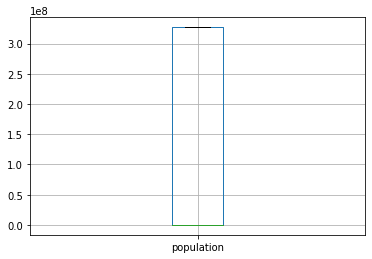

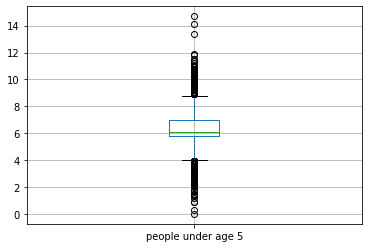

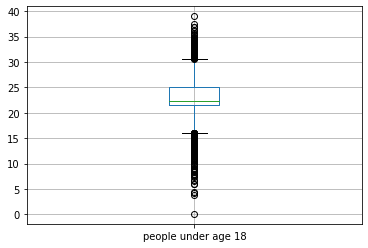

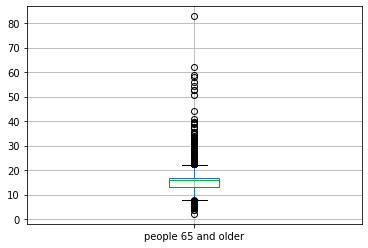

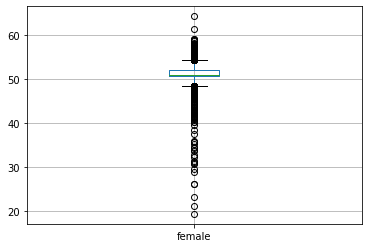

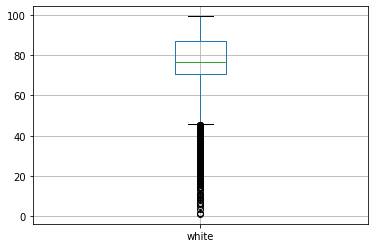

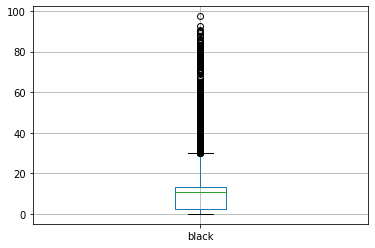

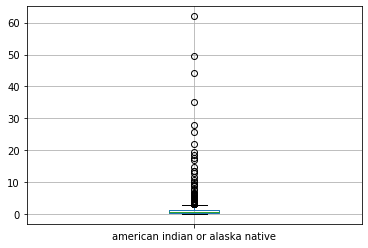

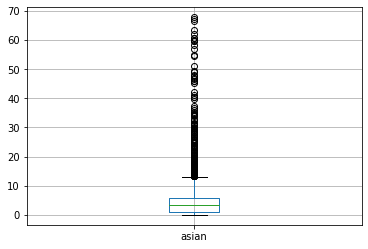

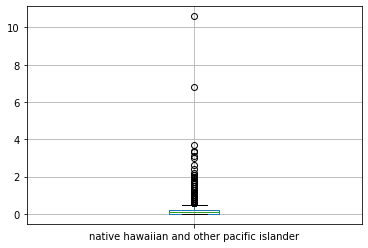

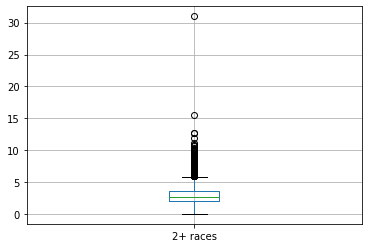

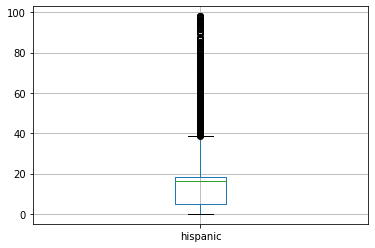

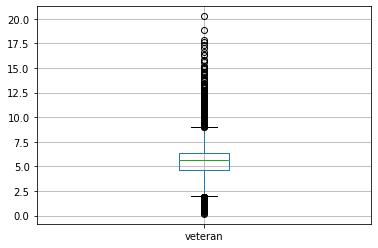

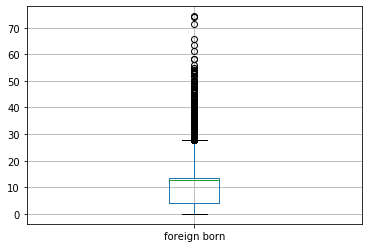

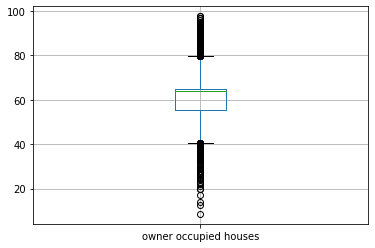

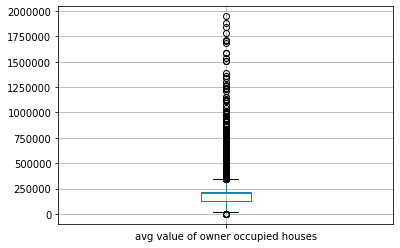

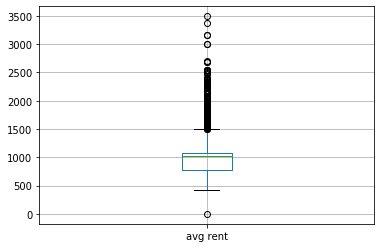

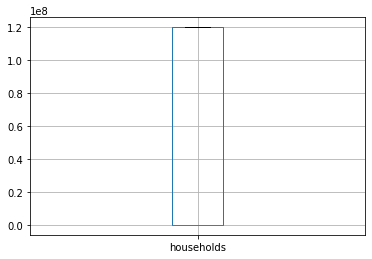

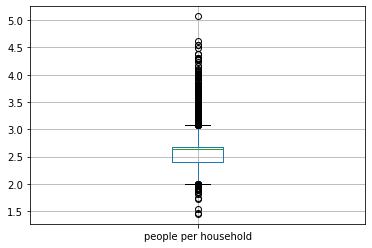

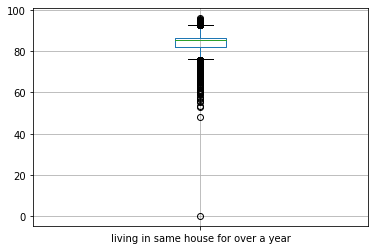

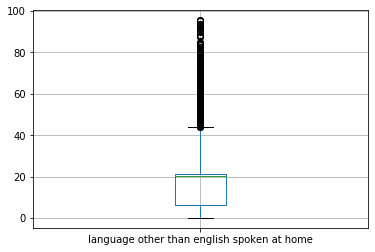

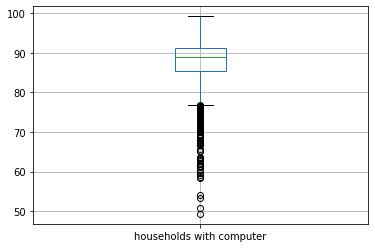

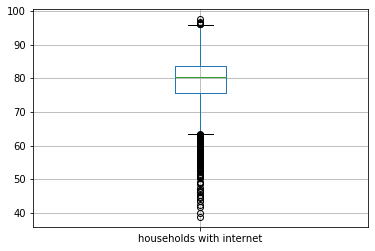

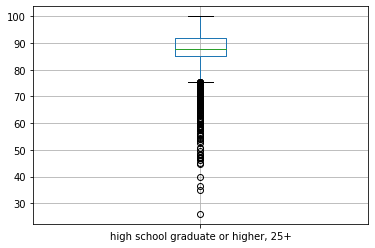

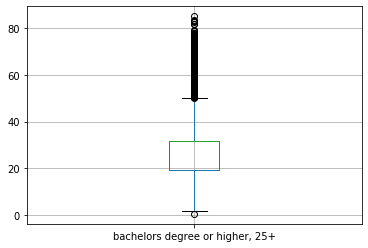

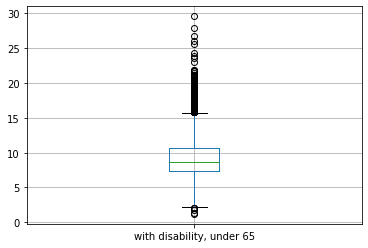

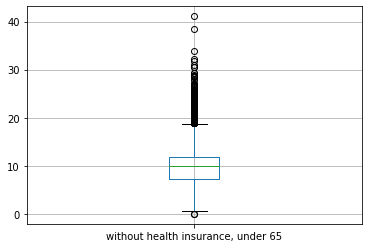

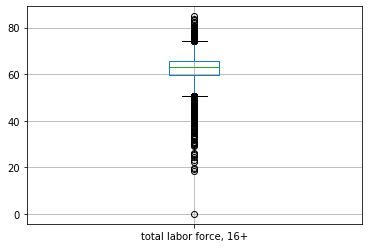

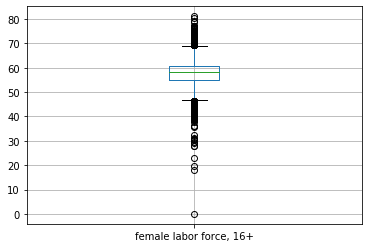

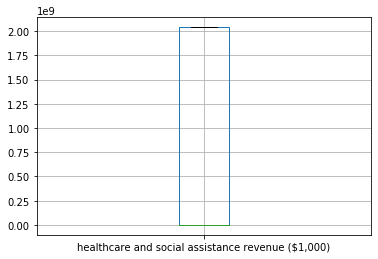

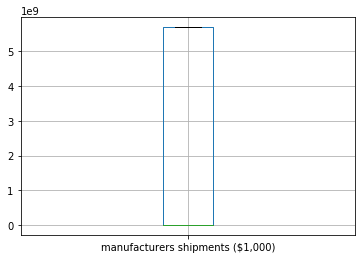

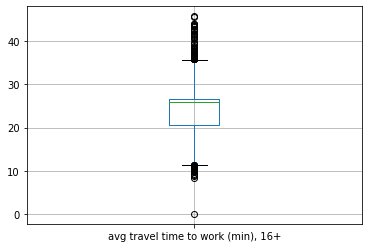

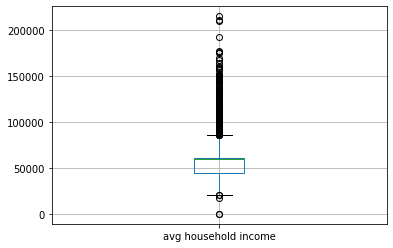

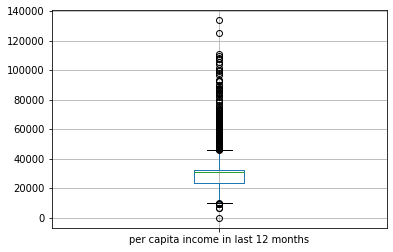

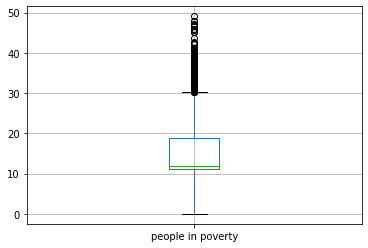

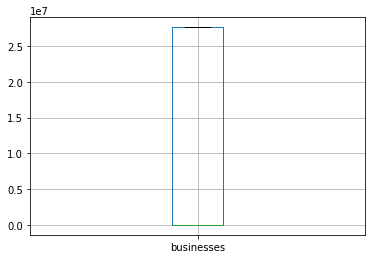

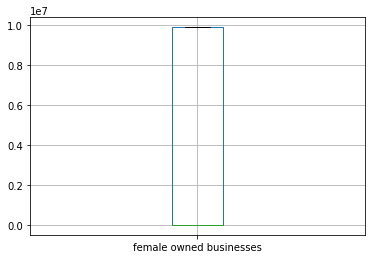

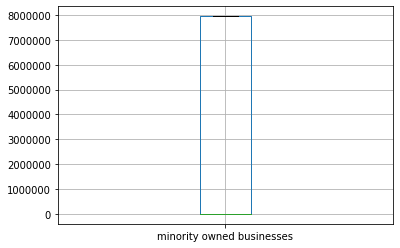

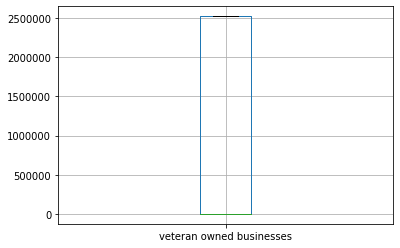

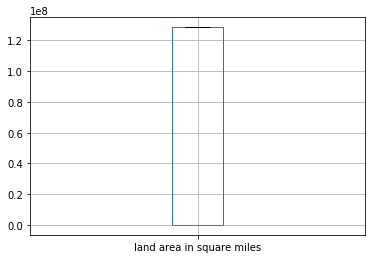

In [37]:
print("With Outliers:")
for column in continuous:
    df.boxplot(column=column)
    plt.show()

In [38]:

def remove_outliers(continous_columns, dataframe):
    """Return a dataframe with any values below the lower fence and above the upper fence removed from given columns in the given dataframe."""
    for column in continous_columns:
        # calculate values for lower fence and upper fence
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        # remove rows from dataframe which fall out of this range
        num_removing = dataframe.shape[0]
        new_df = dataframe[dataframe[column] > lower_fence]
        new_df = dataframe[dataframe[column] < upper_fence]
        num_removing -= new_df.shape[0]
        print(f"{num_removing} rows will be removed from {column}.")
    return new_df

In [39]:
remove_outliers(continuous, df)

0 rows will be removed from population.
170 rows will be removed from people under age 5.
134 rows will be removed from people under age 18.
176 rows will be removed from people 65 and older.
178 rows will be removed from female.
0 rows will be removed from white.
317 rows will be removed from black.
66 rows will be removed from american indian or alaska native.
164 rows will be removed from asian.
178 rows will be removed from native hawaiian and other pacific islander.
197 rows will be removed from 2+ races.
289 rows will be removed from hispanic.
181 rows will be removed from veteran.
273 rows will be removed from foreign born.
154 rows will be removed from owner occupied houses.
382 rows will be removed from avg value of owner occupied houses.
244 rows will be removed from avg rent.
0 rows will be removed from households.
250 rows will be removed from people per household.
61 rows will be removed from living in same house for over a year.
275 rows will be removed from language othe

,political affiliation,population,people under age 5,people under age 18,people 65 and older,female,white,black,american indian or alaska native,asian,...,"manufacturers shipments ($1,000)","avg travel time to work (min), 16+",avg household income,per capita income in last 12 months,people in poverty,businesses,female owned businesses,minority owned businesses,veteran owned businesses,land area in square miles
0,liberal,209880,6.5,20.3,14.2,53.1,25.3,70.5,0.2,0.9,...,4118352,21.8,35346,22993,27.2,20738,8286,10605,2082,0
1,liberal,198218,6.8,24.0,13.7,53.0,33.3,60.6,0.2,2.8,...,9125080,19.7,45921,27172,21.9,18043,7459,8793,2352,0
2,liberal,189572,6.3,21.7,16.0,52.6,44.8,50.6,0.2,1.8,...,3274416,22.4,40588,26023,22.0,20118,8644,8808,2275,0
3,liberal,197318,6.4,21.1,15.7,51.9,61.6,30.6,0.4,2.7,...,6213842,19.1,53840,34589,17.7,16838,6565,4380,1816,0
4,liberal,101113,5.9,18.8,11.7,52.4,51.1,44.1,0.3,2.4,...,4234819,19.3,44120,25364,24.2,6802,2530,1953,670,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,liberal,29315,6.5,23.5,16.9,50.9,86.0,4.7,0.4,0.5,...,251310,14.7,31595,19304,31.4,1663,474,98,135,0
2979,liberal,27204,7.4,23.9,12.6,50.2,75.5,14.9,0.9,0.5,...,385576,18.2,33958,17666,28.7,1478,602,250,177,0
2980,liberal,28005,4.1,14.8,20.0,51.1,92.1,2.1,0.1,3.7,...,561164,23.1,78402,50775,5.0,3410,1086,198,428,0
2981,conservative,327167434,6.1,22.4,16.0,50.8,76.5,13.4,1.3,5.9,...,5696729632,26.6,60293,32621,11.8,27626360,9878397,7952386,2521682,128591812


In [ ]:
df.shape

# EDA

In [ ]:

df.rename(columns={"political affiliation": "politics"},inplace = True)